In [1]:
import numpy as np
import scipy.io
import pandas as pd
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from google.colab import drive
import random
import math
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Processing is now starting for hidden size: 4
EPOCH 0, Training Loss: 0.3344261635962675, Validation Loss: 0.34464600534685014
EPOCH 200, Training Loss: 0.18869677092773032, Validation Loss: 0.192364914619038
EPOCH 400, Training Loss: 0.1695643794367289, Validation Loss: 0.17410889874237698
EPOCH 600, Training Loss: 0.1672377554854072, Validation Loss: 0.17215160331623292
EPOCH 800, Training Loss: 0.1662757299713843, Validation Loss: 0.17136474190974088


<Figure size 1500x500 with 0 Axes>

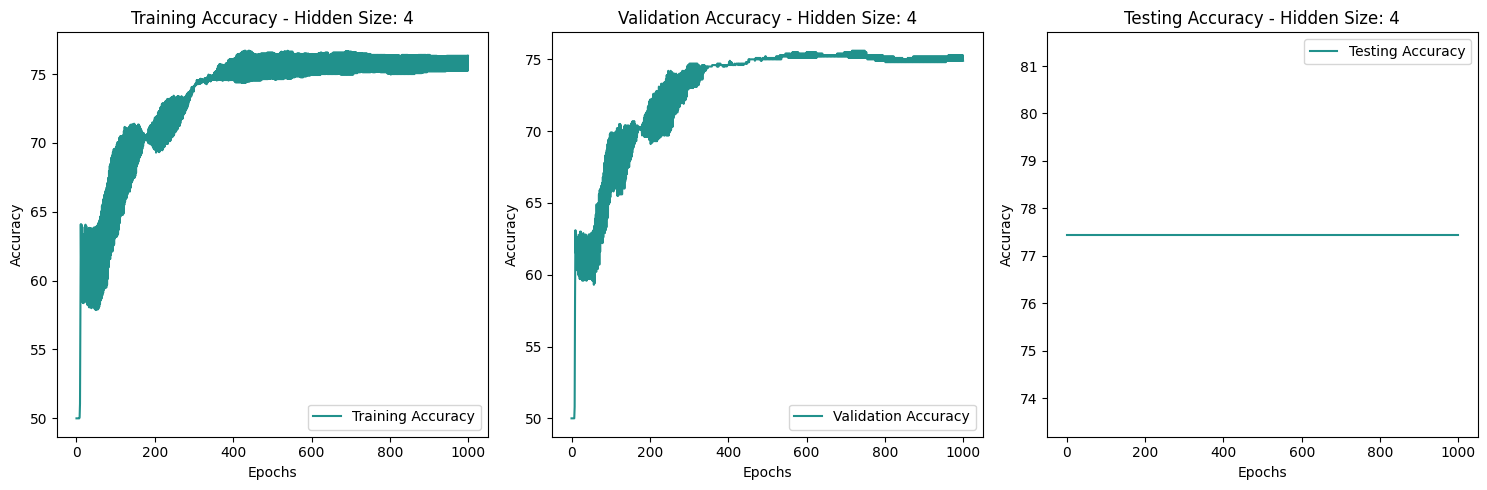

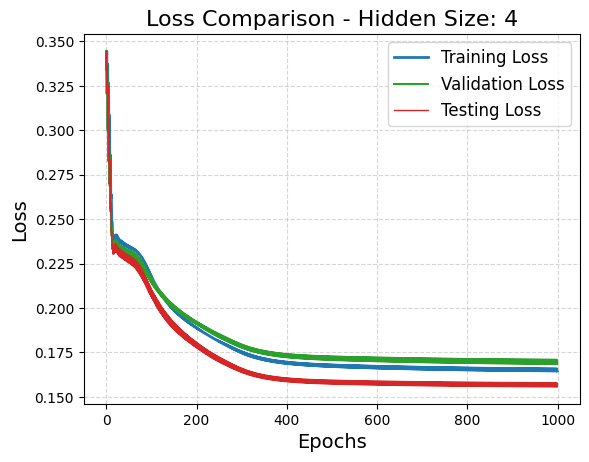

Processing is now starting for hidden size: 8
EPOCH 0, Training Loss: 0.3606795555272099, Validation Loss: 0.41065920350905666
EPOCH 200, Training Loss: 0.19281412579740168, Validation Loss: 0.19430898653926756
EPOCH 400, Training Loss: 0.1750414589623475, Validation Loss: 0.17823592299387092
EPOCH 600, Training Loss: 0.16815597243299943, Validation Loss: 0.17225650122603303
EPOCH 800, Training Loss: 0.16679425289415126, Validation Loss: 0.1711250577443724


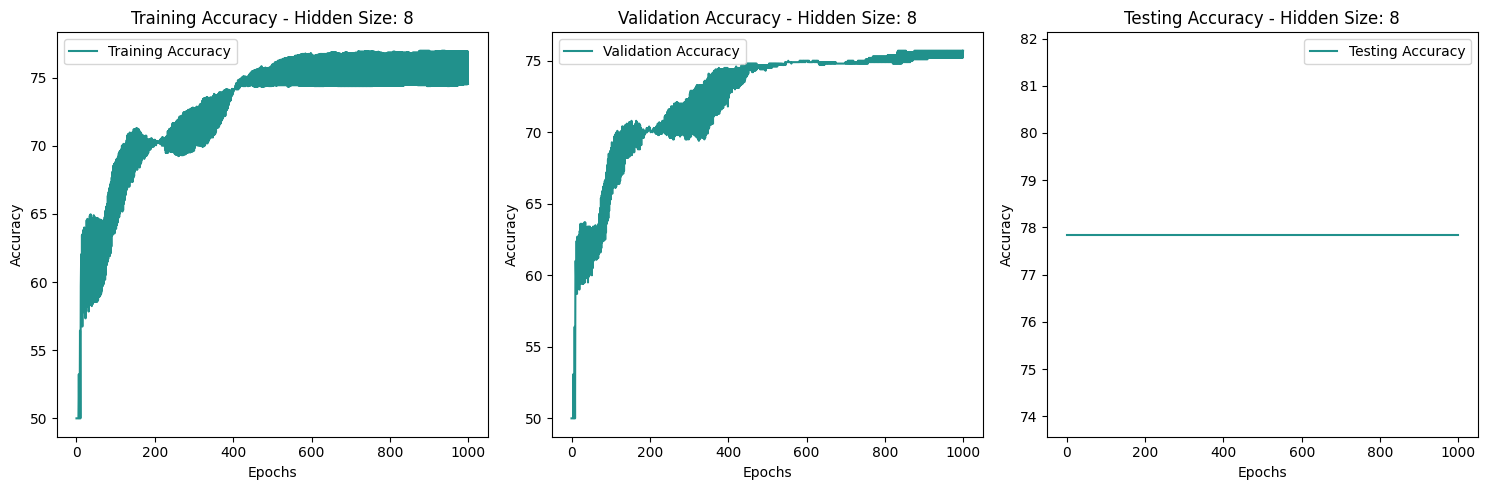

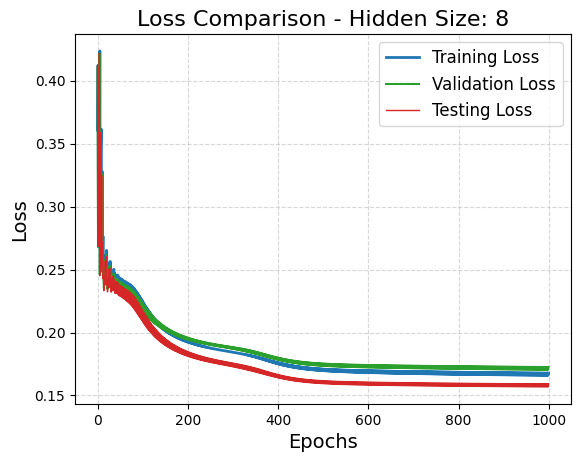

Processing is now starting for hidden size: 10
EPOCH 0, Training Loss: 0.4032449265395337, Validation Loss: 0.3600124045713425
EPOCH 200, Training Loss: 0.2014419547734081, Validation Loss: 0.205482891984961
EPOCH 400, Training Loss: 0.17837090097980335, Validation Loss: 0.18230846761521832
EPOCH 600, Training Loss: 0.1706607989113442, Validation Loss: 0.17509378230889824
EPOCH 800, Training Loss: 0.16898002590810987, Validation Loss: 0.17361590283322928


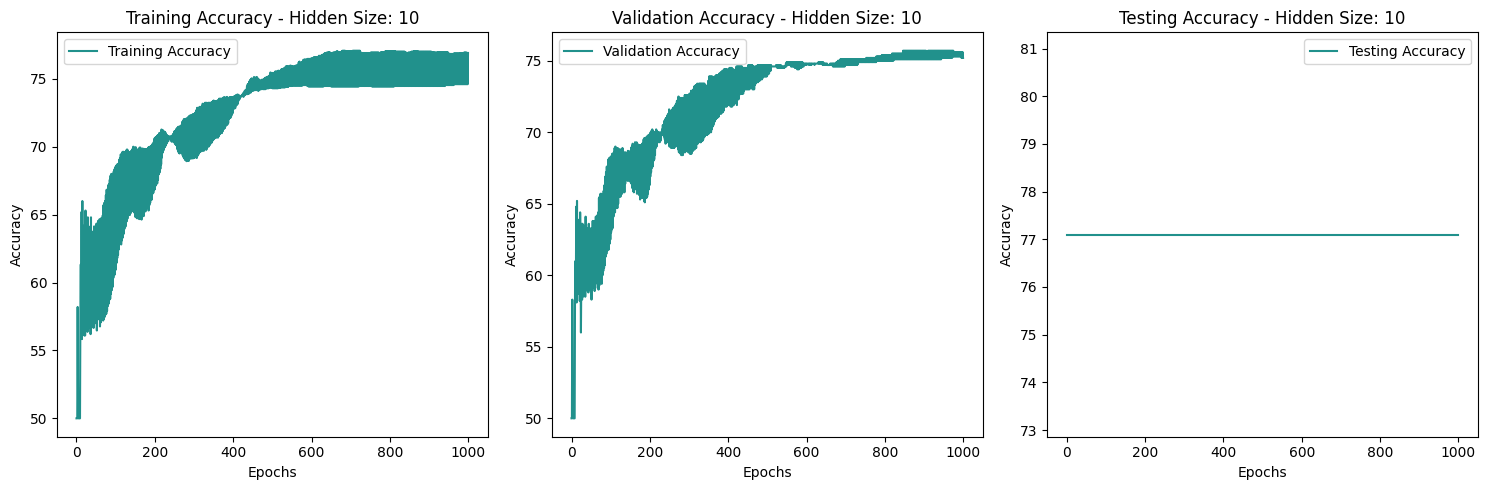

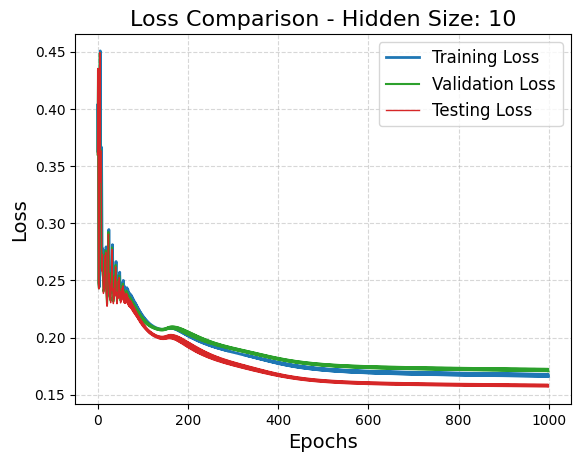

Processing is now starting for hidden size: 12
EPOCH 0, Training Loss: 0.4583044013053971, Validation Loss: 0.3262265831221532
EPOCH 200, Training Loss: 0.1926297159900039, Validation Loss: 0.19672687733682956
EPOCH 400, Training Loss: 0.1815227441739393, Validation Loss: 0.1854877307206534
EPOCH 600, Training Loss: 0.1326166688728683, Validation Loss: 0.1388029412576397
EPOCH 800, Training Loss: 0.12659046119243345, Validation Loss: 0.1347208865926759


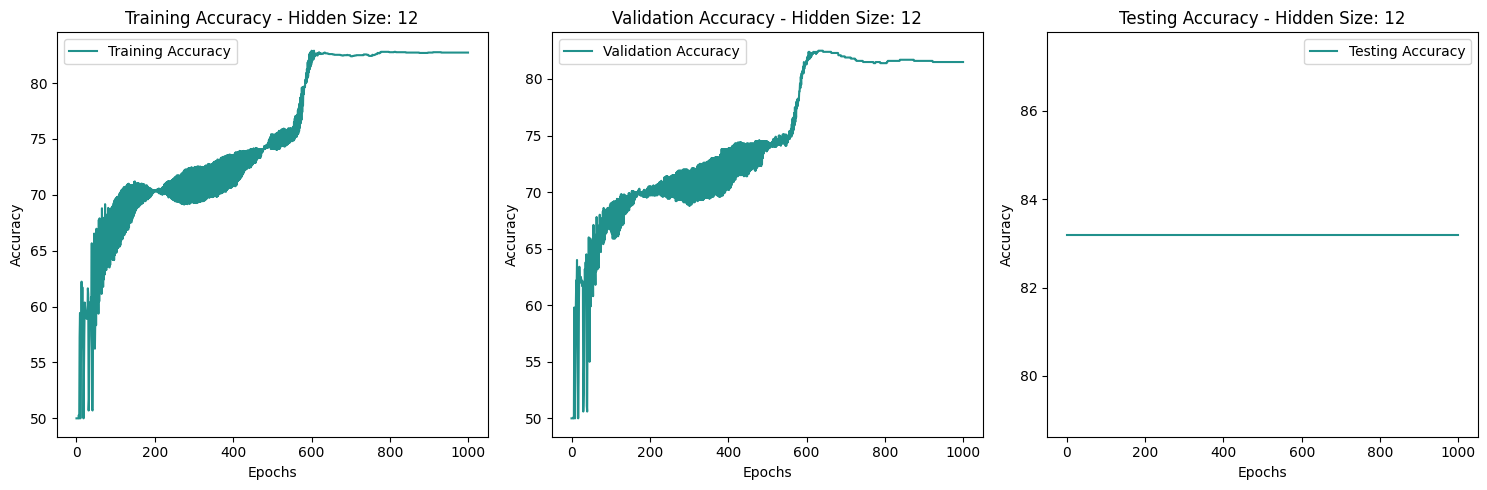

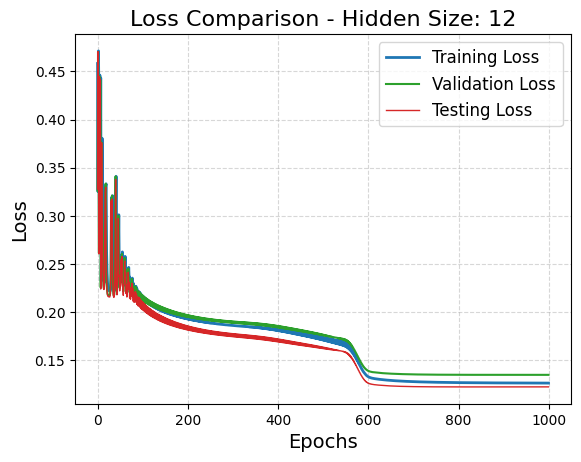

Processing is now starting for hidden size: 14
EPOCH 0, Training Loss: 0.4599369357875313, Validation Loss: 0.3059714858949984
EPOCH 200, Training Loss: 0.19701807919785141, Validation Loss: 0.20127740168230962
EPOCH 400, Training Loss: 0.18517660522090296, Validation Loss: 0.18930565987176887
EPOCH 600, Training Loss: 0.1447700239419186, Validation Loss: 0.14974466145875734
EPOCH 800, Training Loss: 0.12714697337756012, Validation Loss: 0.13519593230421545


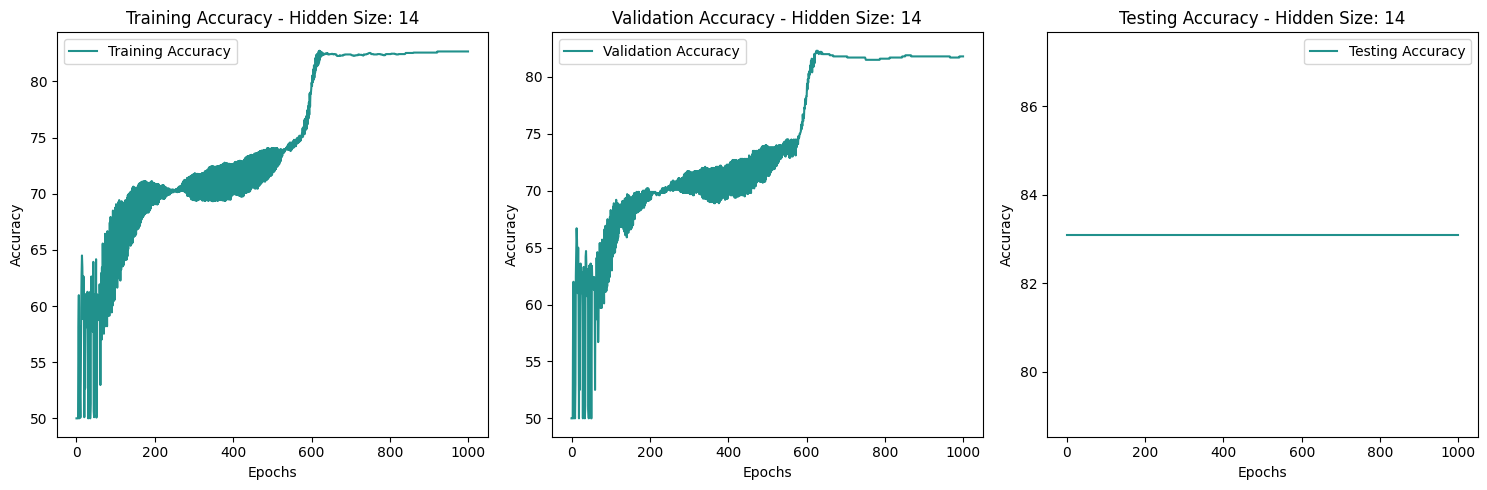

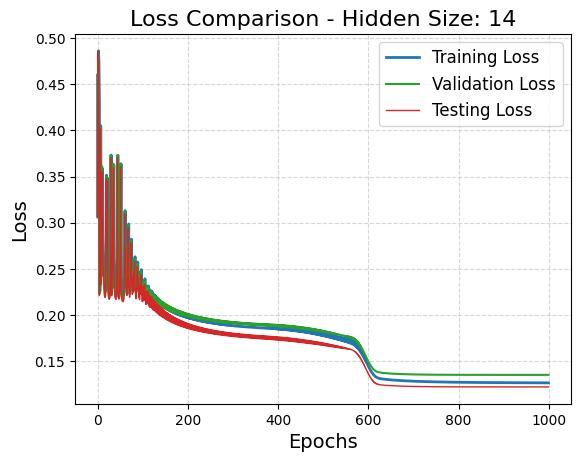

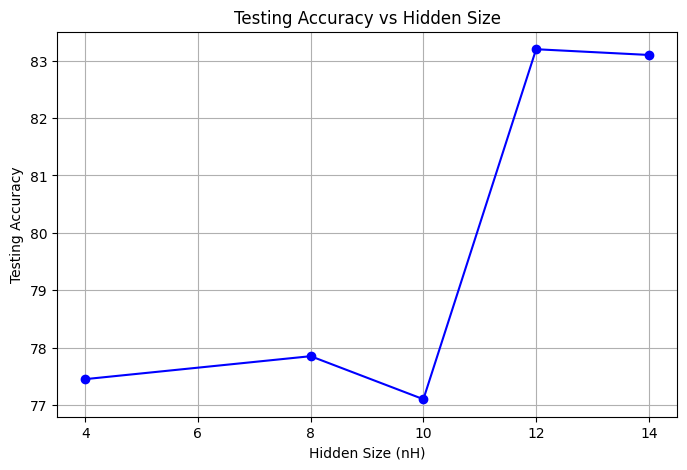

Test accuracy for hidden node: 4 is 77.45
Test accuracy for hidden node: 8 is 77.85
Test accuracy for hidden node: 10 is 77.10000000000001
Test accuracy for hidden node: 12 is 83.2
Test accuracy for hidden node: 14 is 83.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def data_split_between_training_validation(class1_data, class2_data):
    train_data_class1 = class1_data[:1500]
    train_data_class2 = class2_data[:1500]
    validation_data_class1 = class1_data[1500:2000]
    validation_data_class2 = class2_data[1500:2000]
    train_data = np.vstack((train_data_class1, train_data_class2))
    validation_data = np.vstack((validation_data_class1, validation_data_class2))

    return train_data, validation_data

def feature_normalization(data, mean=None, std=None):
    if mean is None or std is None:
        mean = np.mean(data, axis=0)
        std = np.std(data, axis=0)
    normalized_data = (data - mean) / std
    return normalized_data, mean, std

def parameter_init(input_size, hidden_size, output_size):
    np.random.seed(42)
    hidden_input_weights = np.random.rand(input_size, hidden_size)
    biases_hidden = np.zeros((1, hidden_size))
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    biases_output = np.zeros((1, output_size))

    return hidden_input_weights, biases_hidden, weights_hidden_output, biases_output

def plot_loss_comparison(train_data, labels, validation_data, val_labels, test_data, true_labels, epochs, learning_rate, hidden_size):
    input_size = train_data.shape[1]
    output_size = 1
    hidden_input_weights, biases_hidden, weights_hidden_output, biases_output = parameter_init(input_size, hidden_size, output_size)

    # Lists to store loss values
    training_losses = []
    validation_losses = []
    testing_losses = []

    for epoch in range(epochs):
        # Forward pass
        hidden_input = np.dot(train_data, hidden_input_weights) + biases_hidden
        hidden_output = sigmoid(hidden_input)
        final_input = np.dot(hidden_output, weights_hidden_output) + biases_output
        final_output = sigmoid(final_input)

        # Compute loss
        loss = mean_squared_error(final_output, labels)

        # Backward pass
        output_error = labels - final_output
        output_delta = output_error * sigmoid_derivative(final_output)

        hidden_error = output_delta.dot(weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

        # Update weights and biases
        weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
        biases_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        hidden_input_weights += train_data.T.dot(hidden_delta) * learning_rate
        biases_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

        # Validation loss
        hidden_val = np.dot(validation_data, hidden_input_weights) + biases_hidden
        hidden_val_output = sigmoid(hidden_val)
        final_val_input = np.dot(hidden_val_output, weights_hidden_output) + biases_output
        final_val_output = sigmoid(final_val_input)
        val_loss = mean_squared_error(final_val_output, val_labels)

        # Testing loss
        test_data_normalized = (test_data - mean_train) / std_train
        hidden_test = np.dot(test_data_normalized, hidden_input_weights) + biases_hidden
        hidden_test_output = sigmoid(hidden_test)
        final_test_input = np.dot(hidden_test_output, weights_hidden_output) + biases_output
        final_test_output = sigmoid(final_test_input)
        test_loss = mean_squared_error(final_test_output, true_labels)

        # Store losses
        training_losses.append(loss)
        validation_losses.append(val_loss)
        testing_losses.append(test_loss)

    plt.plot(range(epochs), training_losses, label='Training Loss', color='#1f77b4', linewidth=2)
    plt.plot(range(epochs), validation_losses, label='Validation Loss', color='#2ca02c', linewidth=1.5)
    plt.plot(range(epochs), testing_losses, label='Testing Loss', color='#d62728', linewidth=1)
    plt.title(f'Loss Comparison - Hidden Size: {hidden_size}', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


#####################################################################################################################################


# Training
def train_nn(train_data, labels, validation_data, val_labels, epochs, learning_rate, hidden_size):
    input_size = train_data.shape[1]
    output_size = 1
    hidden_input_weights, biases_hidden, weights_hidden_output, biases_output = parameter_init(input_size, hidden_size, output_size)

    training_accuracies = []
    validation_accuracies = []

    for epoch in range(epochs):
        hidden_input = np.dot(train_data, hidden_input_weights) + biases_hidden
        hidden_output = sigmoid(hidden_input)
        final_input = np.dot(hidden_output, weights_hidden_output) + biases_output
        final_output = sigmoid(final_input)
        loss = mean_squared_error(final_output, labels)
        output_error = labels - final_output
        output_delta = output_error * sigmoid_derivative(final_output)
        hidden_error = output_delta.dot(weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_output)
        weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
        biases_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        hidden_input_weights += train_data.T.dot(hidden_delta) * learning_rate
        biases_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

        hidden_val = np.dot(validation_data, hidden_input_weights) + biases_hidden
        hidden_val_output = sigmoid(hidden_val)
        final_val_input = np.dot(hidden_val_output, weights_hidden_output) + biases_output
        final_val_output = sigmoid(final_val_input)
        val_loss = mean_squared_error(final_val_output, val_labels)

        if epoch % 200 == 0:
            print(f'EPOCH {epoch}, Training Loss: {loss}, Validation Loss: {val_loss}')

        predicted_train_labels = (final_output > 0.5).astype(int)
        train_accuracy = np.mean(predicted_train_labels == labels) * 100
        training_accuracies.append(train_accuracy)

        predicted_val_labels = (final_val_output > 0.5).astype(int)
        val_accuracy = np.mean(predicted_val_labels == val_labels) * 100
        validation_accuracies.append(val_accuracy)

        if epoch > 0 and val_loss >= validation_accuracies[-2]:
            break

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(range(len(training_accuracies)), training_accuracies, label='Training Accuracy', color=viridis(0.5))
    plt.title(f'Training Accuracy - Hidden Size: {hidden_size}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(range(len(validation_accuracies)), validation_accuracies, label='Validation Accuracy', color=viridis(0.5))
    plt.title(f'Validation Accuracy - Hidden Size: {hidden_size}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 3, 3)
    test_accuracies = test_nn_plot(test_data, true_labels, hidden_input_weights, biases_hidden, weights_hidden_output, biases_output, mean_train, std_train)
    plt.plot(range(len(test_accuracies)), test_accuracies, label='Testing Accuracy', color=viridis(0.5))
    plt.title(f'Testing Accuracy - Hidden Size: {hidden_size}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return hidden_input_weights, biases_hidden, weights_hidden_output, biases_output

def test_nn(test_data, true_labels, hidden_input_weights, biases_hidden, weights_hidden_output, biases_output, mean, std):
    test_data_normalized = (test_data - mean) / std

    hidden_test = np.dot(test_data_normalized, hidden_input_weights) + biases_hidden
    hidden_test_output = sigmoid(hidden_test)
    final_test_input = np.dot(hidden_test_output, weights_hidden_output) + biases_output
    final_test_output = sigmoid(final_test_input)

    predicted_labels = (final_test_output > 0.5).astype(int)

    test_accuracy = np.mean(predicted_labels == true_labels) * 100

    return test_accuracy

def test_nn_plot(test_data, true_labels, hidden_input_weights, biases_hidden, weights_hidden_output, biases_output, mean, std):
    test_data_normalized = (test_data - mean) / std
    test_accuracies = []

    for epoch in range(epochs):
        hidden_test = np.dot(test_data_normalized, hidden_input_weights) + biases_hidden
        hidden_test_output = sigmoid(hidden_test)
        final_test_input = np.dot(hidden_test_output, weights_hidden_output) + biases_output
        final_test_output = sigmoid(final_test_input)

        predicted_test_labels = (final_test_output > 0.5).astype(int)

        test_accuracy = np.mean(predicted_test_labels == true_labels) * 100
        test_accuracies.append(test_accuracy)

    return test_accuracies

class1_data = pd.read_csv('Train1.txt', delimiter='\s+', header=None)
class2_data = pd.read_csv('Train2.txt', delimiter='\s+', header=None)

train_data, validation_data = data_split_between_training_validation(class1_data, class2_data)
normalized_train_data, mean_train, std_train = feature_normalization(train_data)
normalized_validation_data = (validation_data - mean_train) / std_train
labels_class1 = np.zeros((1500, 1))
labels_class2 = np.ones((1500, 1))
labels = np.vstack((labels_class1, labels_class2))

# Assuming labels for validation data
val_labels_class1 = np.zeros((500, 1))
val_labels_class2 = np.ones((500, 1))
val_labels = np.vstack((val_labels_class1, val_labels_class2))

# Assuming true labels for testing data
true_labels_class1 = np.zeros((1000, 1))
true_labels_class2 = np.ones((1000, 1))
true_labels = np.vstack((true_labels_class1, true_labels_class2))

hidden_sizes = [4, 8, 10, 12, 14]

epochs = 1000

plt.figure(figsize=(15, 5))

# Testing Accuracy Plot
test_accuracies_all = []

class1_test_data = pd.read_csv('Test1.txt', delimiter='\s+', header=None)
class2_test_data = pd.read_csv('Test2.txt', delimiter='\s+', header=None)
test_data=pd.concat((class1_test_data,class2_test_data),axis=0)


for i, hidden_size in enumerate(hidden_sizes):
    print("Processing is now starting for hidden size: {}".format(hidden_size))
    trained_hidden_input_weights, trained_biases_hidden, trained_weights_hidden_output, trained_biases_output = train_nn(normalized_train_data, labels, normalized_validation_data, val_labels, epochs=epochs, learning_rate=0.01, hidden_size=hidden_size)
    test_accuracies = test_nn_plot(test_data, true_labels, trained_hidden_input_weights, trained_biases_hidden, trained_weights_hidden_output, trained_biases_output, mean_train, std_train)

    test_accuracies_all.append(test_accuracies[-1])
    plot_loss_comparison(normalized_train_data, labels, normalized_validation_data, val_labels, test_data, true_labels, epochs, 0.01, hidden_size)


# Accuracy vs nH Plot
plt.figure(figsize=(8, 5))
plt.plot(hidden_sizes, test_accuracies_all, marker='o', linestyle='-', color='b')
plt.title('Testing Accuracy vs Hidden Size')
plt.xlabel('Hidden Size (nH)')
plt.ylabel('Testing Accuracy')
plt.grid(True)
plt.show()


for x,y in zip(test_accuracies_all,hidden_sizes):
  print("Test accuracy for hidden node: {} is {}".format(y,x))